<a href="https://colab.research.google.com/github/SHREEMATHI-S/employee-feedback-survey/blob/main/Analyze_employee_feedback_surveys_to_identify_areas_of_improvement.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
uploads = files.upload()

Saving employee_review_mturk_dataset_test_v6_kaggle.csv to employee_review_mturk_dataset_test_v6_kaggle.csv


In [5]:
uploads = files.upload()

Saving employee_review_mturk_dataset_v10_kaggle.csv to employee_review_mturk_dataset_v10_kaggle.csv


In [18]:
print(df.columns)

Index(['id', 'person_name', 'nine_box_category', 'feedback', 'adjusted',
       'reviewed', 'label', 'feedback_len', 'num_of_sent', 'performance_class',
       'potential_class', 'feedback_clean', 'data_type'],
      dtype='object')


In [6]:
uploads = files.upload()

Saving test_set.csv to test_set.csv


In [7]:
uploads = files.upload()

Saving train_set.csv to train_set.csv


In [19]:
print(df.columns)

Index(['id', 'person_name', 'nine_box_category', 'feedback', 'adjusted',
       'reviewed', 'label', 'feedback_len', 'num_of_sent', 'performance_class',
       'potential_class', 'feedback_clean', 'data_type'],
      dtype='object')


In [8]:
uploads = files.upload()

Saving validation_set.csv to validation_set (1).csv


In [20]:
print(df.columns)

Index(['id', 'person_name', 'nine_box_category', 'feedback', 'adjusted',
       'reviewed', 'label', 'feedback_len', 'num_of_sent', 'performance_class',
       'potential_class', 'feedback_clean', 'data_type'],
      dtype='object')


In [9]:
pip install pandas matplotlib seaborn nltk wordcloud textblob scikit-learn


In [10]:
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

In [11]:
# Display the first few rows
print(df.head())

# Display summary information
print(df.info())

# Display the column names
print(df.columns)


      id     person_name                                  nine_box_category  \
0  10046   Douglas Henry  Category 1: 'Risk' (Low performance, Low poten...   
1  10002  Freddie Davies  Category 1: 'Risk' (Low performance, Low poten...   
2  10001  Freddie Davies  Category 1: 'Risk' (Low performance, Low poten...   
3     86  Broderick Hays  Category 1: 'Risk' (Low performance, Low poten...   
4     84  Broderick Hays  Category 1: 'Risk' (Low performance, Low poten...   

                                            feedback  adjusted  reviewed  \
0  Douglas Henry has not performed at a high leve...     False     False   
1  Freddie Davies onboarded the team a few months...     False     False   
2  Freddie Davies needs lots of improvement in hi...     False     False   
3  Broderick is not doing so well. His work on a ...     False     False   
4  Broderick is always such a wildcard to put in ...     False     False   

   label  feedback_len  num_of_sent  performance_class  potential_cl

In [12]:
print(df.isnull().sum())


id                   0
person_name          0
nine_box_category    0
feedback             0
adjusted             0
reviewed             0
label                0
feedback_len         0
num_of_sent          0
performance_class    0
potential_class      0
feedback_clean       0
data_type            0
dtype: int64


In [21]:
from textblob import TextBlob

# Sentiment polarity score for each feedback
df['sentiment'] = df['feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)


In [22]:
def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)


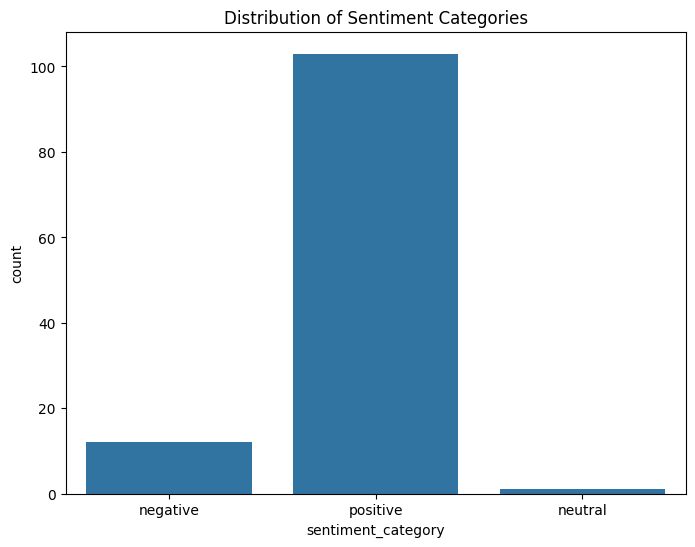

In [23]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df)
plt.title('Distribution of Sentiment Categories')
plt.show()


In [27]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
import nltk

# Download the stopwords
nltk.download('stopwords')
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

stop_words = set(stopwords.words('english'))
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [29]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


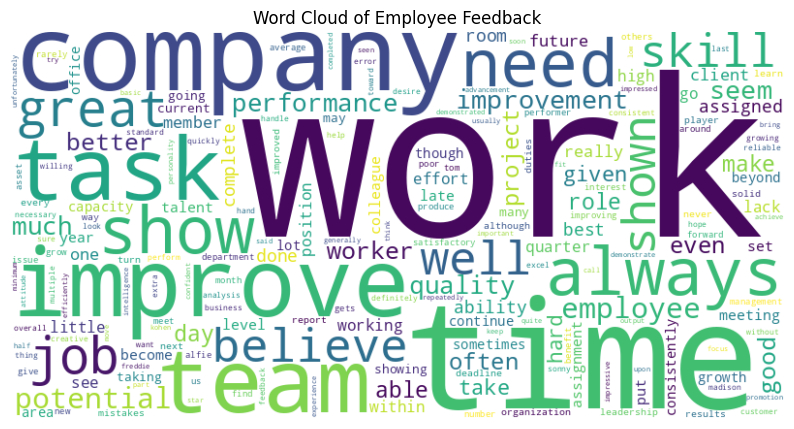

[('work', 112), ('company', 39), ('time', 37), ('improve', 33), ('team', 29), ('tasks', 27), ('always', 27), ('great', 25), ('job', 25), ('well', 21), ('shown', 21), ('believe', 21), ('however', 21), ('potential', 20), ('quality', 17), ('performance', 17), ('needs', 17), ('much', 17), ('good', 16), ('better', 16)]


In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Load dataset


# Data Preprocessing
df.dropna(subset=['feedback'], inplace=True)
df['feedback'] = df['feedback'].str.lower()
df['feedback_len'] = df['feedback'].apply(len)
df['num_of_sent'] = df['feedback'].apply(lambda x: len(x.split('.')))

# Sentiment Analysis
df['sentiment'] = df['feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Word Cloud
stop_words = set(stopwords.words('english'))
df['feedback_clean'] = df['feedback'].apply(lambda x: " ".join([word for word in word_tokenize(x) if word.isalnum() and word not in stop_words]))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['feedback_clean']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Employee Feedback')
plt.show()

# Most frequent words
all_words = " ".join(df['feedback_clean']).split()
word_counts = Counter(all_words)
print(word_counts.most_common(20))


In [33]:
from collections import Counter

# Tokenize the cleaned feedback text
all_words = " ".join(df['feedback_clean']).split()
word_counts = Counter(all_words)

# Display the 20 most common words
print(word_counts.most_common(20))


[('work', 112), ('company', 39), ('time', 37), ('improve', 33), ('team', 29), ('tasks', 27), ('always', 27), ('great', 25), ('job', 25), ('well', 21), ('shown', 21), ('believe', 21), ('however', 21), ('potential', 20), ('quality', 17), ('performance', 17), ('needs', 17), ('much', 17), ('good', 16), ('better', 16)]


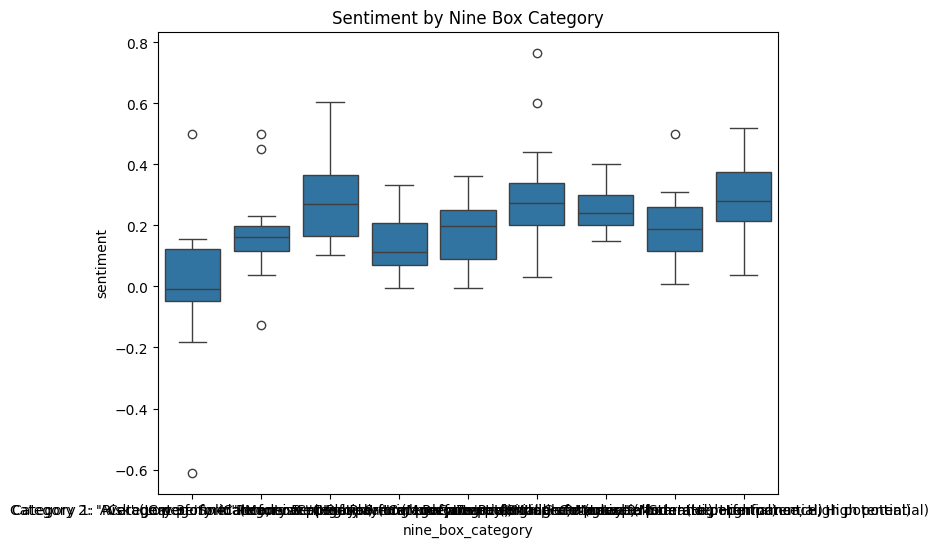

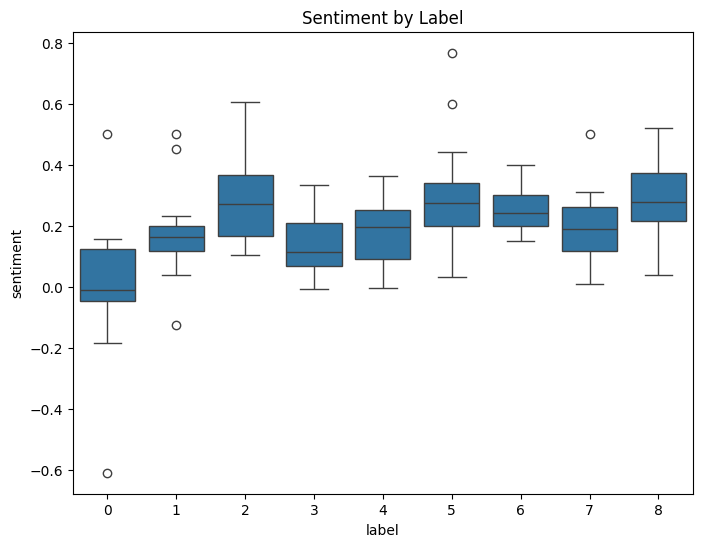

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='nine_box_category', y='sentiment', data=df)
plt.title('Sentiment by Nine Box Category')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='sentiment', data=df)
plt.title('Sentiment by Label')
plt.show()


In [35]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['feedback_clean'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

for index, topic in enumerate(lda.components_):
    print(f'Top 10 words for Topic #{index+1}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")


Top 10 words for Topic #1:
['better', 'member', 'consistently', 'mistakes', 'believe', 'make', 'improve', 'company', 'time', 'work']


Top 10 words for Topic #2:
['potential', 'really', 'company', 'great', 'skills', 'hard', 'time', 'job', 'team', 'work']


Top 10 words for Topic #3:
['potential', 'performance', 'time', 'year', 'quality', 'great', 'company', 'good', 'tasks', 'work']


Top 10 words for Topic #4:
['working', 'madison', 'tasks', 'great', 'assigned', 'company', 'believe', 'improve', 'job', 'work']


Top 10 words for Topic #5:
['overall', 'improvement', 'quality', 'able', 'performance', 'employees', 'improve', 'employee', 'shown', 'work']




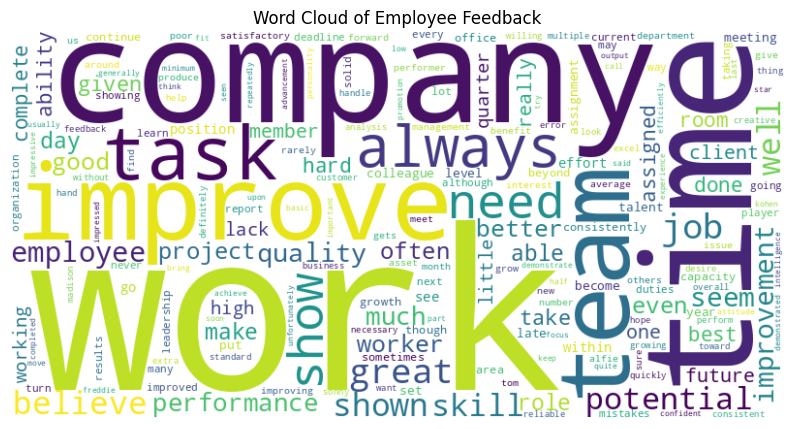

[('work', 112), ('company', 39), ('time', 37), ('improve', 33), ('team', 29), ('tasks', 27), ('always', 27), ('great', 25), ('job', 25), ('well', 21), ('shown', 21), ('believe', 21), ('however', 21), ('potential', 20), ('quality', 17), ('performance', 17), ('needs', 17), ('much', 17), ('good', 16), ('better', 16)]


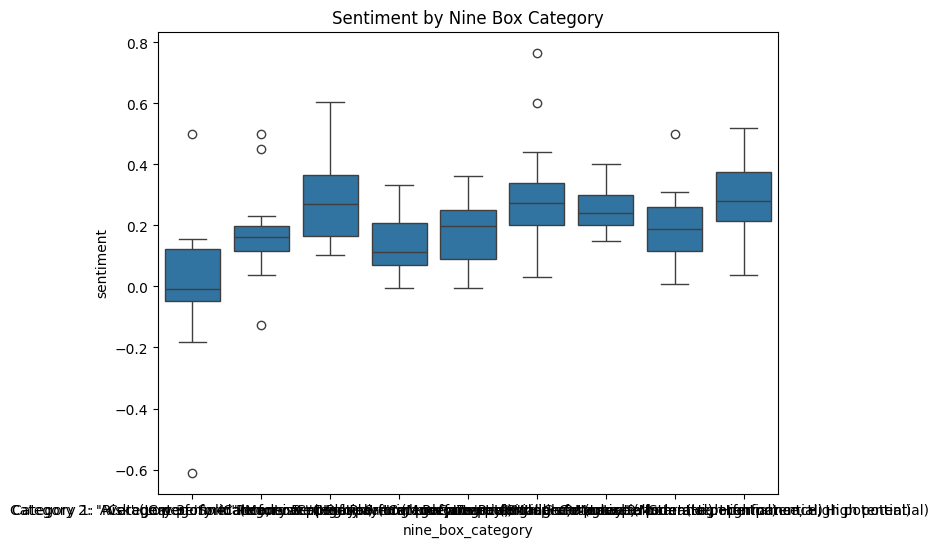

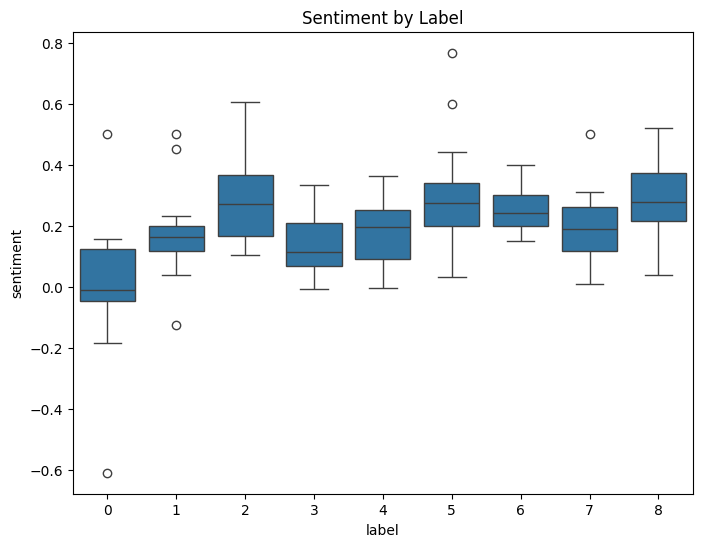

Top 10 words for Topic #1:
['better', 'member', 'consistently', 'mistakes', 'believe', 'make', 'improve', 'company', 'time', 'work']


Top 10 words for Topic #2:
['potential', 'really', 'company', 'great', 'skills', 'hard', 'time', 'job', 'team', 'work']


Top 10 words for Topic #3:
['potential', 'performance', 'time', 'year', 'quality', 'great', 'company', 'good', 'tasks', 'work']


Top 10 words for Topic #4:
['working', 'madison', 'tasks', 'great', 'assigned', 'company', 'believe', 'improve', 'job', 'work']


Top 10 words for Topic #5:
['overall', 'improvement', 'quality', 'able', 'performance', 'employees', 'improve', 'employee', 'shown', 'work']




In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
from wordcloud import WordCloud
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Load dataset


# Data Preprocessing
df.dropna(subset=['feedback'], inplace=True)
df['feedback'] = df['feedback'].str.lower()
df['feedback_len'] = df['feedback'].apply(len)
df['num_of_sent'] = df['feedback'].apply(lambda x: len(x.split('.')))

# Sentiment Analysis
df['sentiment'] = df['feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Word Cloud
stop_words = set(stopwords.words('english'))
df['feedback_clean'] = df['feedback'].apply(lambda x: " ".join([word for word in word_tokenize(x) if word.isalnum() and word not in stop_words]))

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['feedback_clean']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Employee Feedback')
plt.show()

# Most frequent words
all_words = " ".join(df['feedback_clean']).split()
word_counts = Counter(all_words)
print(word_counts.most_common(20))

# Correlation and Insights
plt.figure(figsize=(8, 6))
sns.boxplot(x='nine_box_category', y='sentiment', data=df)
plt.title('Sentiment by Nine Box Category')
plt.show()

plt.figure(figsize=(8, 6))
sns.boxplot(x='label', y='sentiment', data=df)
plt.title('Sentiment by Label')
plt.show()

# Topic Modeling
vectorizer = CountVectorizer(max_df=0.95, min_df=2, stop_words='english')
dtm = vectorizer.fit_transform(df['feedback_clean'])

lda = LatentDirichletAllocation(n_components=5, random_state=42)
lda.fit(dtm)

for index, topic in enumerate(lda.components_):
    print(f'Top 10 words for Topic #{index+1}:')
    print([vectorizer.get_feature_names_out()[i] for i in topic.argsort()[-10:]])
    print("\n")


In [42]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')



# Display the first few rows of the dataframe
print(df.head())

# Data Preprocessing
df.dropna(subset=['feedback'], inplace=True)
df['feedback'] = df['feedback'].str.lower()
df['feedback_len'] = df['feedback'].apply(len)
df['num_of_sent'] = df['feedback'].apply(lambda x: len(x.split('.')))

# Sentiment Analysis
df['sentiment'] = df['feedback'].apply(lambda x: TextBlob(x).sentiment.polarity)

def categorize_sentiment(polarity):
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

df['sentiment_category'] = df['sentiment'].apply(categorize_sentiment)

# Clean up the feedback column (remove stopwords)
stop_words = set(nltk.corpus.stopwords.words('english'))
df['feedback_clean'] = df['feedback'].apply(lambda x: " ".join([word for word in nltk.word_tokenize(x) if word.isalnum() and word not in stop_words]))

# Finalized dataset ready for analysis
print(df.head())


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


      id     person_name                                  nine_box_category  \
0  10046   Douglas Henry  Category 1: 'Risk' (Low performance, Low poten...   
1  10002  Freddie Davies  Category 1: 'Risk' (Low performance, Low poten...   
2  10001  Freddie Davies  Category 1: 'Risk' (Low performance, Low poten...   
3     86  Broderick Hays  Category 1: 'Risk' (Low performance, Low poten...   
4     84  Broderick Hays  Category 1: 'Risk' (Low performance, Low poten...   

                                            feedback  adjusted  reviewed  \
0  douglas henry has not performed at a high leve...     False     False   
1  freddie davies onboarded the team a few months...     False     False   
2  freddie davies needs lots of improvement in hi...     False     False   
3  broderick is not doing so well. his work on a ...     False     False   
4  broderick is always such a wildcard to put in ...     False     False   

   label  feedback_len  num_of_sent  performance_class  potential_cl

<ipython-input-43-eca391673b96>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='sentiment_category', data=df, palette='coolwarm')


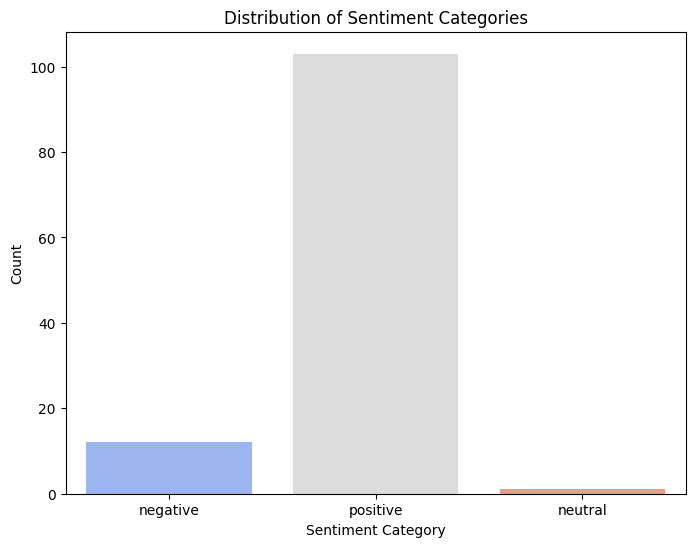

In [43]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment_category', data=df, palette='coolwarm')
plt.title('Distribution of Sentiment Categories')
plt.xlabel('Sentiment Category')
plt.ylabel('Count')
plt.show()


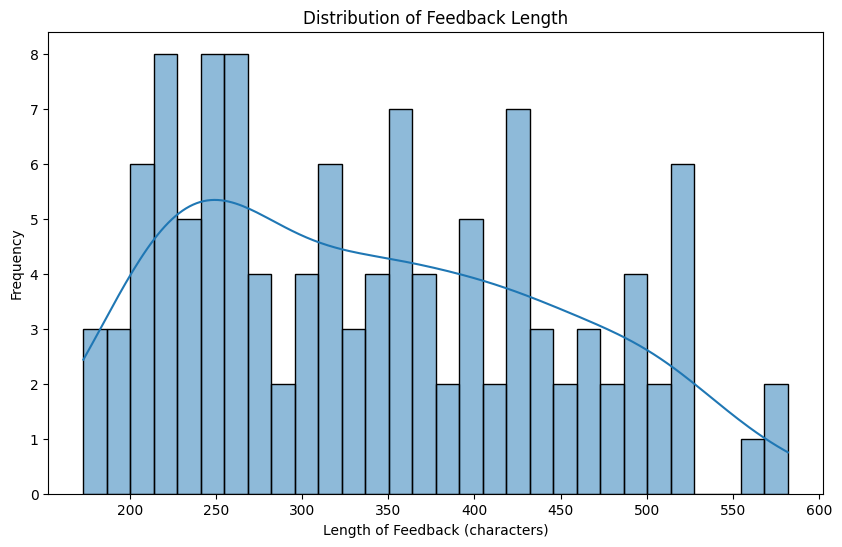

In [44]:
plt.figure(figsize=(10, 6))
sns.histplot(df['feedback_len'], bins=30, kde=True)
plt.title('Distribution of Feedback Length')
plt.xlabel('Length of Feedback (characters)')
plt.ylabel('Frequency')
plt.show()


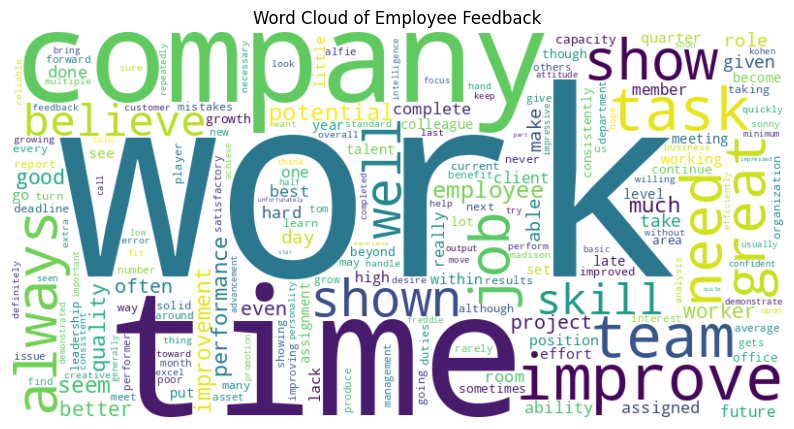

In [45]:
from wordcloud import WordCloud

wordcloud = WordCloud(width=800, height=400, background_color='white').generate(" ".join(df['feedback_clean']))
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Employee Feedback')
plt.show()


In [46]:
# Save the processed data to a new Excel file
df.to_excel('processed_employee_feedback.xlsx', index=False)
